In [1]:
import pandas as pd
import glob
import json
import os
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
path = '/content/drive/MyDrive/Dataset/angle/'
dir_list = os.listdir(path)

print(dir_list)

['sit', 'walk', 'jump', 'clap', 'wave', 'stand', 'run']


In [4]:
def extract_angles(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    angle_list = []
    for frame in data["data"]:
        for angle in frame["angle"]["data"]:
            angle_list.append(float(angle["angle"]))
    return angle_list

In [5]:
all_rows = []
for action in dir_list:
    rows = []
    path = '/content/drive/MyDrive/Dataset/angle/'+action
    file = glob.glob(path+'/*.json')
    for filename in file:
        angle = extract_angles(filename)
        row = {'angles': angle, 'action': action}
        rows.append(row)
    rows = np.array(rows)
    all_rows.extend(rows)
data = pd.DataFrame(all_rows)    
data

,angles,action
0,"[88.56790381583536, 117.5528115767178, 90.0, 1...",sit
1,"[40.10090754621224, 46.16913932790743, 88.5311...",sit
2,"[81.02737338510362, 351.0273733851036, 68.1985...",sit
3,"[92.04540848888723, 85.23635830927383, 117.407...",sit
4,"[55.92280471986926, 70.14478563067895, 99.7275...",sit
...,...,...
276,"[79.11447294534128, 97.12501634890181, 98.7461...",run
277,"[71.56505117707799, 26.56505117707799, 50.1944...",run
278,"[0.0, 349.695153531234, 95.71059313749963, 204...",run
279,"[132.51044707800085, 108.43494882292201, 65.77...",run


In [6]:
x = []
for row in data["angles"].values:
  x.append(row)

x = np.asarray(x)
y = data["action"].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((196, 96), (85, 96), (196,), (85,))

In [8]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=to_categorical(y_train)

y_test=encoder.fit_transform(y_test)
y_test=to_categorical(y_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [10]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [26]:
print(str(accuracy_score(y_test,y_pred)*100))

21.176470588235293


In [27]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(x_train, y_train)
    ypred = knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))

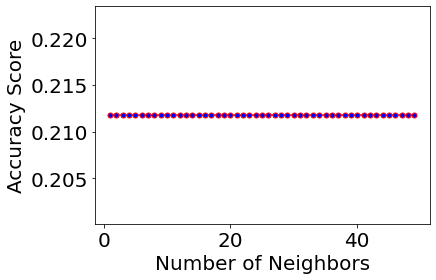

In [28]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [29]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [30]:
plt.show()

In [31]:
scores = np.array(scores)

In [32]:
#Final result after training the model
print'Optimal No. Of Neighbors: ', scores.argmax()+1
print'Accuracy Score: '+ str(scores.max()*100)+ ' %'

SyntaxError: ignored